In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import nltk

df = pd.read_parquet('trump2_dataset2.parquet.gzip')

https://en.wikipedia.org/wiki/Donald_Trump
Trump launched his campaign (June 16, 2015). Let's see what happened with his tweets since then.

In [32]:
df = df[(df['created_at_est'] >= '2015-06-16') & (df['created_at_est'] < '2017-08-01')].copy()

In [33]:
df['election_period'] = np.where(df['created_at_est'] > '2016-11-09', 'after', 'before')

In [240]:
before_election = df[df.election_period == 'before'].copy()
# Convert the list of words before election to a list
before_election_wordlist = before_election['list_of_words'].to_list()
# Reduce the nested list to one-dimension list
before_election_flatten_wordlist = sum(before_election_wordlist,[])

before_election_words = pd.Series(before_election_flatten_wordlist).astype('str')

# Count the frequency of word used before election
before_election_wordlist = before_election_words.reset_index(name='words').groupby('words')['words'].count().reset_index(name='before_count').sort_values(by=['before_count'], ascending=False)
before_election_wordlist.head()

,words,before_count
4407,thank,706
1898,great,634
2043,hillary,378
3217,people,279
2972,new,277


In [140]:
after_election = df[df.election_period == 'after'].copy()
# Convert the list of words after election to a list
after_election_wordlist = after_election['list_of_words'].to_list()
# Reduce the nested list to one-dimension list
after_election_flatten_wordlist = sum(after_election_wordlist,[])

after_election_words = pd.Series(after_election_flatten_wordlist).astype('str')
# Count the frequency of word used after election
after_election_wordlist = after_election_words.reset_index(name='words').groupby('words')['words'].count().reset_index(name='after_count').sort_values(by=['after_count'], ascending=False)
after_election_wordlist.head()

,words,after_count
1194,great,224
1871,news,93
2042,people,82
1000,fake,82
2863,today,82


In [180]:
summary = before_election_wordlist.merge(after_election_wordlist, on='words', how = 'outer')
summary.fillna(0, inplace = True)
summary['total_count'] = summary['before_count'] + summary['after_count']
summary['freq_after_freq_before_election'] =  round((summary['after_count'] + 1) /(summary['before_count'] + 1),3)
summary.sort_values(by =  'freq_after_freq_before_election', ascending = False, inplace = True, ignore_index = True)
summary.head()

,words,before_count,after_count,total_count,freq_after_freq_before_election
0,fake,0.0,82.0,82.0,83.0
1,hunt,0.0,13.0,13.0,14.0
2,witch,0.0,13.0,13.0,14.0
3,cuts,0.0,12.0,12.0,13.0
4,optimism,0.0,11.0,11.0,12.0


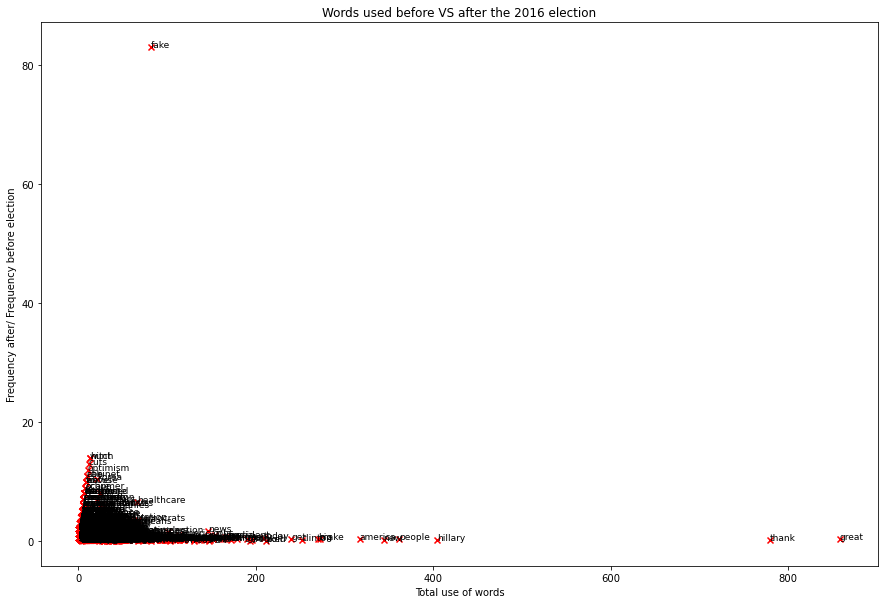

In [39]:
#Y = Frequency after/ Frequency before election
#X = Total use of words
fig = plt.figure(figsize = (15,10))
for i, txt in enumerate(summary.words):
    x = summary.total_count[i]
    y = summary.freq_after_freq_before_election[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.001, y, txt, fontsize=9)

plt.xlabel('Total use of words')
plt.ylabel('Frequency after/ Frequency before election')
plt.title('Words used before VS after the 2016 election')
plt.show()

In [181]:
# It's very difficult to understand the graph. Let's only focus on the top and the bottom 100 Frequency after/ Frequency before election ratio
summary_head = summary.head(100).copy()
summary_tail = summary.tail(100).copy()
summary_head

,words,before_count,after_count,total_count,freq_after_freq_before_election
0,fake,0.0,82.0,82.0,83.0
1,hunt,0.0,13.0,13.0,14.0
2,witch,0.0,13.0,13.0,14.0
3,cuts,0.0,12.0,12.0,13.0
4,optimism,0.0,11.0,11.0,12.0
...,...,...,...,...,...
95,phones,0.0,3.0,3.0,4.0
96,chelsea,0.0,3.0,3.0,4.0
97,jon,0.0,3.0,3.0,4.0
98,cars,0.0,3.0,3.0,4.0


In [182]:
summary2 = pd.concat([summary_head,summary_tail], ignore_index = True)
summary2

,words,before_count,after_count,total_count,freq_after_freq_before_election
0,fake,0.0,82.0,82.0,83.000
1,hunt,0.0,13.0,13.0,14.000
2,witch,0.0,13.0,13.0,14.000
3,cuts,0.0,12.0,12.0,13.000
4,optimism,0.0,11.0,11.0,12.000
...,...,...,...,...,...
195,nevada,43.0,0.0,43.0,0.023
196,cruz,145.0,2.0,147.0,0.021
197,marco,46.0,0.0,46.0,0.021
198,ted,103.0,1.0,104.0,0.019


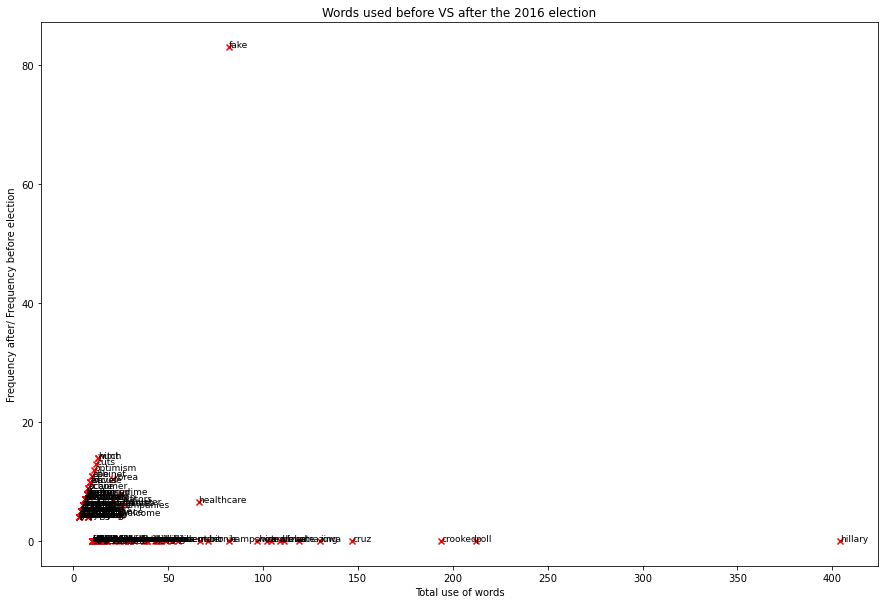

In [183]:
plt.figure(figsize = (15,10))
ax = plt.subplot()
# ax.set_yscale('log')

for i, txt in enumerate(summary2.words):
    x = summary2.total_count[i]
    y = summary2.freq_after_freq_before_election[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.001, y, txt, fontsize=9)

plt.xlabel('Total use of words')
plt.ylabel('Frequency after/ Frequency before election')
plt.title('Words used before VS after the 2016 election')
plt.show()

As shown on the above graph, Trump didn't talk about his competitors including “Hillary” and “Clinton” as many times as before. It is noticeable that he mentioned a word “fake”, as in “fake news” far greater than others. Donald Trump takes the oath of office as the 45th President of the United States on 20 January 2016. He started using the term only in December, claiming it after some articles blaming Trump’s election.

In [234]:
# The frequency use of the phase 'fake news' over time
fake_df = df[(df['created_at_est'] >= '2015-06-16') & (df['created_at_est'] < '2017-08-01')]
fake_df['fake_count'] = fake_df['text'].apply(lambda x: x.lower().count('fake news'))

In [235]:
fake_count = fake_df.groupby(fake_df.created_at_est.dt.to_period("M"))['fake_count'].agg('sum').reset_index(name = 'count')
fake_total = int(fake_count.sum())
fake_count['%count'] = fake_count['count']/fake_total

/Users/miki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1091: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [236]:
fake_count

,created_at_est,count,%count
0,2015-07,0,0.000000
1,2015-08,0,0.000000
2,2015-09,0,0.000000
3,2015-10,0,0.000000
4,2015-11,0,0.000000
5,2015-12,0,0.000000
6,2016-01,0,0.000000
7,2016-02,0,0.000000
8,2016-03,0,0.000000
9,2016-04,0,0.000000


/Users/miki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


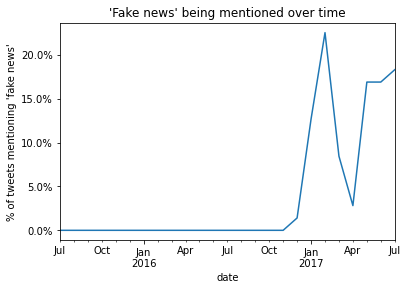

In [237]:
ax = fake_count.plot.line('created_at_est','%count')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title("'Fake news' being mentioned over time")
plt.xlabel('date')
plt.ylabel("% of tweets mentioning 'fake news'")
ax.get_legend().remove()

Trump was using this phrase (fake news) more than ever since early February, with ~22% of his tweets mentioning it. In retrospect, this was a savvy social media move.